In [276]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
FILE_PATH = "GooglePlaystore.xlsx"
df =  pd.read_excel(io = FILE_PATH)
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


Preprocessing

Problem 1)

In [277]:
df.drop(df.loc[(df.Reviews == '3.0M')].index,axis=0, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


Problem 2)

In [278]:
for entry in df.columns.to_list():
    df.drop(df.loc[(df[entry] == 'Varies with device')].index,axis=0, inplace=True)
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


Problem 3)

In [279]:
new = df["Android Ver"].replace(to_replace='and(.)*', value='', regex=True)
for value in new:
    if len(str(value)) > 4:
        new = new.replace(to_replace =value,value =value[0:3] )
        
df["Android Ver"] = new
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


Problem 4)

In [280]:
new_list = [str(s).replace(",", '') for s in df["Installs"].to_list()]
new_list = [str(s).replace("+", '') for s in new_list]
new_list = [int(i) for i in new_list]
df["Installs"] = new_list   
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


Problem 5)

In [281]:
df.drop(df.loc[(df.Reviews < 100) & (df.Installs < 50000) & (df.Rating.isna())]["Rating"].index,axis=0, inplace=True)
df['Rating'] = df['Rating'].transform(lambda val: val.fillna(val.mean())).round(2)
#df['Rating'].isnull().values.any()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


Problem 6)

In [282]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0
new_list = [int(value_to_float(s)) for s in df["Size"].to_list()]
df["Size"] = new_list   
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,0,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


Analysis

Problem 1)

In [283]:
df.describe()

,Rating,Size,Installs
count,7685.000000,7.685000e+03,7.685000e+03
mean,4.172406,2.283742e+07,8.115315e+06
std,0.544566,2.341416e+07,4.925806e+07
min,1.000000,0.000000e+00,1.000000e+00
25%,4.000000,5.200000e+06,1.000000e+04
50%,4.300000,1.400000e+07,1.000000e+05
75%,4.500000,3.300000e+07,1.000000e+06
max,5.000000,1.000000e+08,1.000000e+09


Problem 2)

In [284]:

def get_best_of(col: pd.DataFrame):
    index_list = df.loc[df.Type == "Free"][col.name].sort_values(ascending= False).index.to_list()
    return df.loc[index_list].drop_duplicates('App')[0:3]
get_best_of(df['Reviews'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1879,Clash of Clans,GAME,4.6,44893888,98000000,100000000,Free,0,Everyone 10+,Strategy,2018-07-15 00:00:00,10.322.16,4.1
1872,Subway Surfers,GAME,4.5,27725352,76000000,1000000000,Free,0,Everyone 10+,Arcade,2018-07-12 00:00:00,1.90.0,4.1
1878,Clash Royale,GAME,4.6,23136735,97000000,100000000,Free,0,Everyone 10+,Strategy,2018-06-27 00:00:00,2.3.2,4.1


Problem 3)

In [285]:
[("Avg",df.loc[df.Type == "Paid"]['Price'].mean()),("Max",df.loc[df.Type == "Paid"]['Price'].max()),("Min",df.loc[df.Type == "Paid"]['Price'].min())]


[('Avg', 15.139163763066062), ('Max', 400), ('Min', 0.99)]

Visualization

Problem 1)

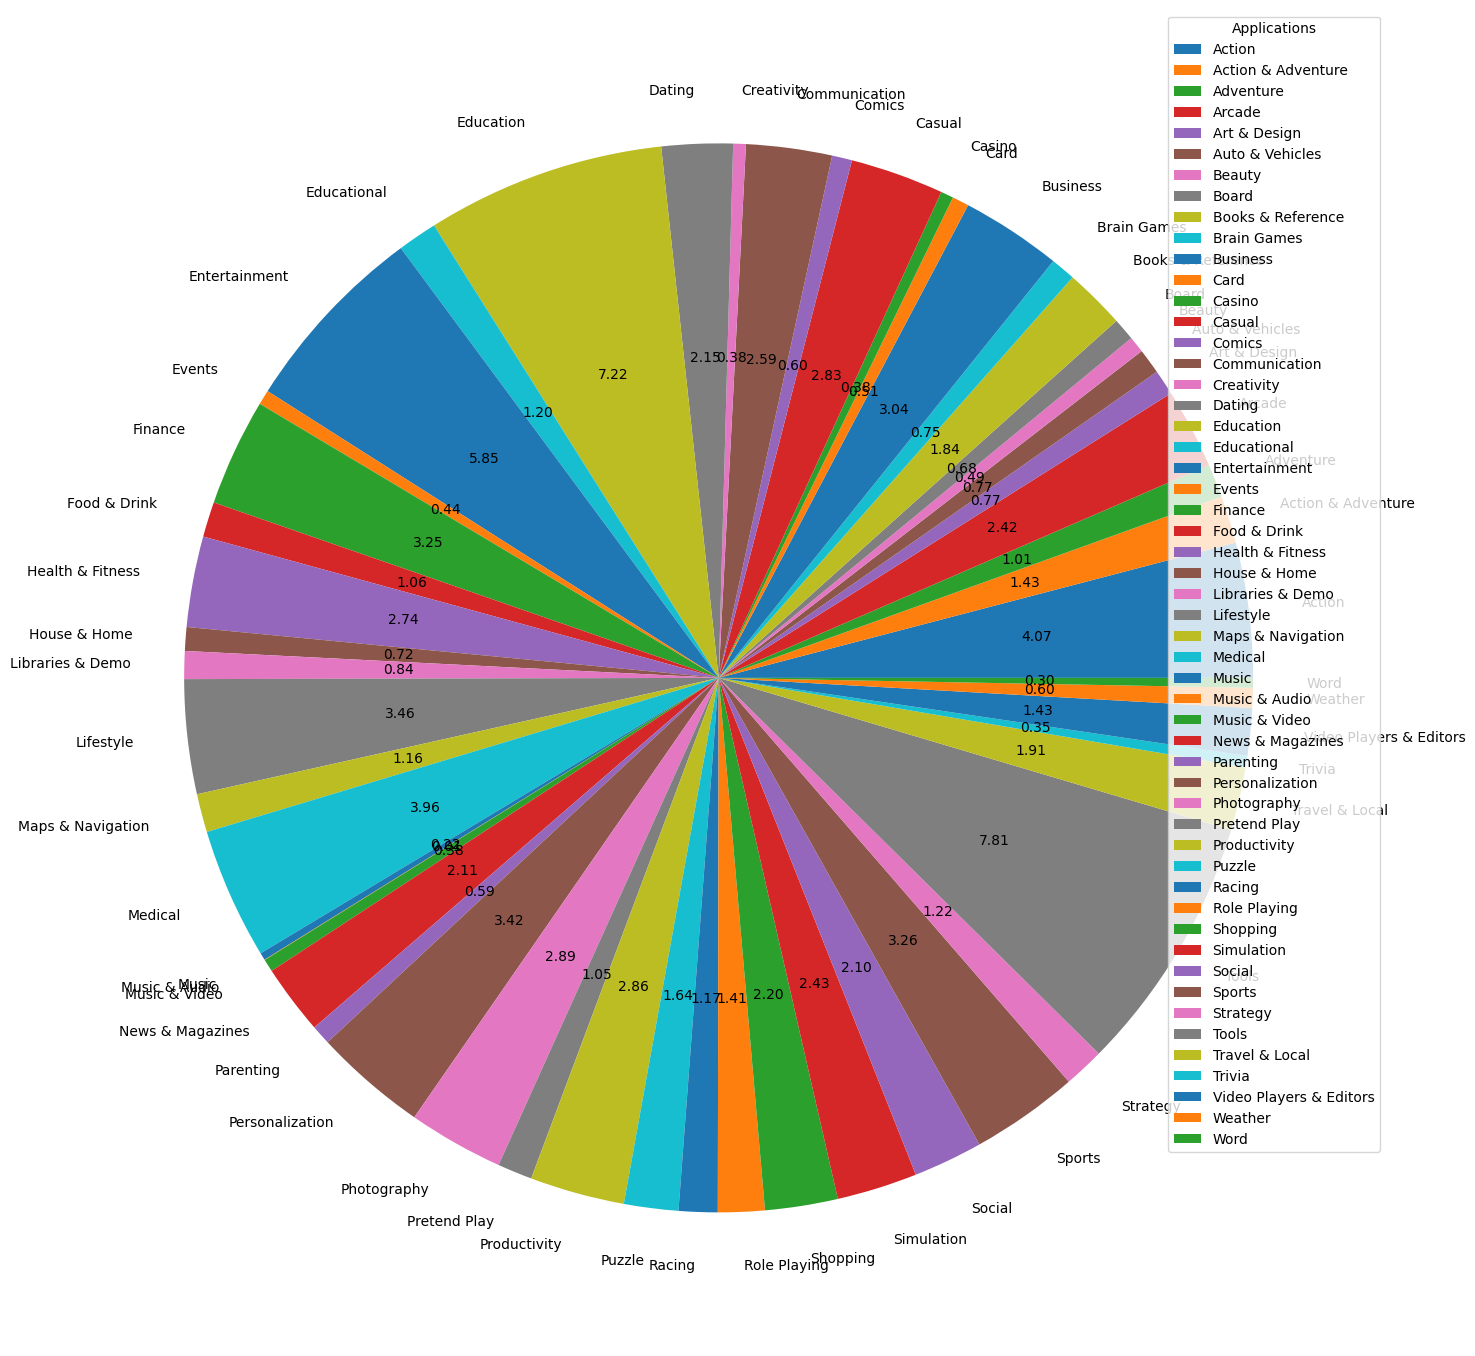

In [286]:
def func(pct, allvalues):
    absolute = float(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
df['Genres'] = df['Genres'].str.split(';')
data = df.explode('Genres').groupby('Genres')['Genres'].describe()
label = data['count'].index.to_list()
info = data['count'].to_list()
plt.title = 'Count the number of applications per genre'
plt.figure(figsize=(15,15))
plt.pie(info,labels = label,autopct='%1.2f')
plt.tight_layout()
plt.legend(title = "Applications")
plt.show()


Problem 2)

In [295]:
df.groupby('Category')['Category'].describe()['EDUCATION']

,count,unique,top,freq
Category,,,,
ART_AND_DESIGN,59,1,ART_AND_DESIGN,59
AUTO_AND_VEHICLES,62,1,AUTO_AND_VEHICLES,62
BEAUTY,40,1,BEAUTY,40
BOOKS_AND_REFERENCE,147,1,BOOKS_AND_REFERENCE,147
BUSINESS,246,1,BUSINESS,246
COMICS,49,1,COMICS,49
COMMUNICATION,210,1,COMMUNICATION,210
DATING,174,1,DATING,174
EDUCATION,110,1,EDUCATION,110
